In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv


# <div style="text-align: center; background-color:#4a89bd;  color: black; padding: 14px; line-height: 0.5;"> <b>Credit Cards Spending :Prediction</b></div>


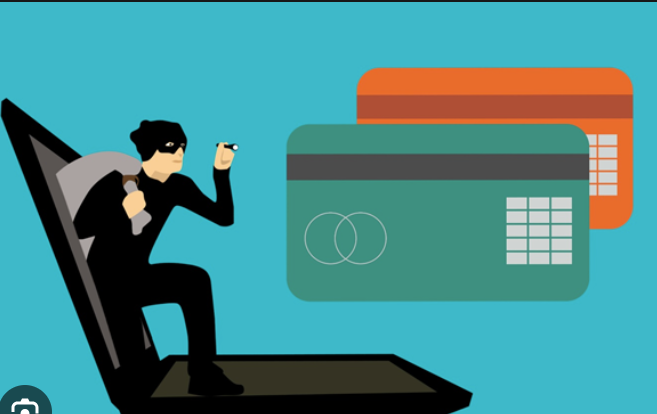

# <div style="text-align: left; background-color:#4a89bd;  color: black; padding: 14px; line-height: 0.5;"> Importing Libraries</div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import colorama
from colorama import Fore, Back, Style



#ignoring warnings to keep the output clean
import warnings
warnings.filterwarnings('ignore')

# <div style="text-align: left; background-color: #4a89bd;  color: black; padding: 14px; line-height: 0.5;"> Reading Datasets from csv files</div>

In [3]:
cd_df = pd.read_csv('/kaggle/input/analyzing-credit-card-spending-habits-in-india/Credit card transactions - India - Simple.csv')
print(Back.BLUE+ Style.BRIGHT+'Credit Card Spending Habits in India:'+ Style.RESET_ALL)
cd_df.head().style.set_properties(**{'background-color': '#4a89bd' ,'color':'black','border-color': '#000000'})

Credit Card Spending Habits in India:


,index,City,Date,Card Type,Exp Type,Gender,Amount
0,0,"Delhi, India",29-Oct-14,Gold,Bills,F,82475
1,1,"Greater Mumbai, India",22-Aug-14,Platinum,Bills,F,32555
2,2,"Bengaluru, India",27-Aug-14,Silver,Bills,F,101738
3,3,"Greater Mumbai, India",12-Apr-14,Signature,Bills,F,123424
4,4,"Bengaluru, India",5-May-15,Gold,Bills,F,171574


In [4]:
print(Back.BLUE+ Style.BRIGHT+ 'Summary of Credit Card Data:' + Style.RESET_ALL)
print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Card Type' + Style.RESET_ALL+'       :',\
      Fore.RED+ Style.BRIGHT+ str(len(cd_df['Card Type'].unique())) + Style.RESET_ALL + ' (Gold, Platinum, Silver, Signature)')

print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Expenses Type' + Style.RESET_ALL +'   :',\
      Fore.RED+ Style.BRIGHT+ str(len(cd_df['Exp Type'].unique())) + Style.RESET_ALL + ' (Bills, Food, Entertainment, Grocery, Fuel, Travel)')

print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Cities' + Style.RESET_ALL +'          :',\
      Fore.RED+ Style.BRIGHT+ str(len(cd_df['Gender'].unique())) + Style.RESET_ALL + ' (Male, Female)')

print('Total number of ' + Fore.BLACK+ Style.BRIGHT+ 'Cities' + Style.RESET_ALL +'          :',\
      Fore.RED+ Style.BRIGHT+ str(len(cd_df['City'].unique())) + Style.RESET_ALL)


Summary of Credit Card Data:
Total number of Card Type       : 4 (Gold, Platinum, Silver, Signature)
Total number of Expenses Type   : 6 (Bills, Food, Entertainment, Grocery, Fuel, Travel)
Total number of Cities          : 2 (Male, Female)
Total number of Cities          : 986


# <div style="text-align: left; background-color: #4a89bd;  color: black; padding: 14px; line-height: 0.5;"> Exploratory Data Analysis</div>

In [5]:
cd_df['Date'] = pd.to_datetime(cd_df['Date']) 
cd_df['Year-Month'] = cd_df['Date'].to_numpy().astype('datetime64[M]') 
cd_df['City'] = cd_df['City'].apply(lambda x: x.split(",")[0])

monthly_df = cd_df[['Year-Month','Card Type','Amount']].groupby(['Year-Month','Card Type']).agg(mean_exp_amt=('Amount', 'mean')).reset_index().sort_values(['Year-Month','Card Type'])
monthly_df['mean_exp_amt']=monthly_df['mean_exp_amt'].astype('int')

fig = px.line(data_frame=monthly_df, x='Year-Month',y='mean_exp_amt', color='Card Type',template='simple_white',markers=True)
# fig.update_traces(mode="markers+lines", hovertemplate=None)
fig.update_yaxes(showgrid=True)
fig.update_layout(hovermode="x unified")

fig.update_layout(
    title='<b>Monthly Mean Expenditure Trend - Line Plot</b>',
    font_family="Courier New",
    title_font_family="Courier New",
    title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Year Month</b>",
    yaxis_title="<b>Mean Expenditure</b>",
    legend_title='<b>Card Type</b>',
    legend_title_font_color="red",
    plot_bgcolor = '#FFFFFF'
)

fig.show()

In [6]:
monthly_df['Year-Month']=monthly_df['Year-Month'].astype(str)
fig=px.violin(data_frame=monthly_df, x='Year-Month',y='mean_exp_amt',template='simple_white',
              color='Year-Month',
               color_discrete_sequence= ['red', 'orange', 'blue', 'green']) 
fig.update_yaxes(showgrid=True)

fig.update_layout(
    title='<b>Monthly Mean Expenditure Trend-Violin Plot</b>',
    font_family="Courier New",
    title_font_family="Times New Roman",title_font_color="red",
    title_font_size=20,
    xaxis_title="<b>Year Month</b>",
    yaxis_title="<b>Mean Expenditure</b>",
    plot_bgcolor = '#FFFFFF'
)

fig.show()

### <div style="text-align: left; background-color: #4a89bd;  color: black; padding: 14px; line-height: 0.5;"> Spend Analysis on Gender</div>

In [7]:
colors = ['pink', 'teal', 'black', 'silver']  # Add more colors if needed


In [8]:
#Expense Type : Amount and Count
gen_exp_amt_df = cd_df[['Gender', 'Amount']].groupby('Gender')['Amount'].agg(['sum','count']).reset_index()
gen_exp_amt_df.columns=['Gender', 'Total Amount', 'Transactions']
gen_exp_amt_df = gen_exp_amt_df.sort_values('Total Amount', ascending= False)
gen_exp_amt_df

fig = make_subplots(rows=1,cols=2,specs=[[{'type':'domain'},{'type':'xy'}]],
                    vertical_spacing = 0.25, horizontal_spacing=.1,
                    subplot_titles=["Count","Amount"]    )
fig.add_trace(go.Pie(labels=gen_exp_amt_df['Gender'], values=gen_exp_amt_df['Transactions'], name="Count", marker_colors=colors),row=1,col=1)
fig.add_trace(go.Bar(x=gen_exp_amt_df['Gender'], y=gen_exp_amt_df['Total Amount'],name="Total Amount", text=gen_exp_amt_df['Total Amount'],marker_color=colors),row=1,col=2)
fig.update_layout(height=400,width=1000, title_text="<b>Gender wise Count and Total Amount</b>",
                  title_font_family="Times New Roman",title_font_color="#83502e",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  showlegend=True,
                  legend_bgcolor='#fdf1cb',
                  paper_bgcolor='#fdf1cb',
                  plot_bgcolor ='#fdf1cb')
fig.show()

<div style="text-align: left; background-color: ##4a89bd;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>  
We can see females spending more amount than males.  
We can see more number of transactons in <b>Food</b> followed by <b>Fuel</b> and <b>Bills</b> in the third place.  
Total Amount wise we have highest amount in <b>Bills</b>, followed by <b>Food</b> and <b>Fuel</b> in the third place

### <div style="text-align: left; background-color: #4a89bd;  color: black; padding: 14px; line-height: 0.5;"> Classifying Cities into Tier-1,  Tier-2 and  Tier-3</div>

<div style="text-align: left; background-color: #4abdb8;  color: black; padding: 14px; line-height: 1.0;"> <b>Observation:</b>The spending paterns are generally affected by city/town in which the customer lives. So, let us classify the cities given in the dataset into Tier-1, Tier-2 and Tier-3 cities.

Reference : Classification of cities taken from  source: https://en.wikipedia.org/wiki/Classification_of_Indian_cities

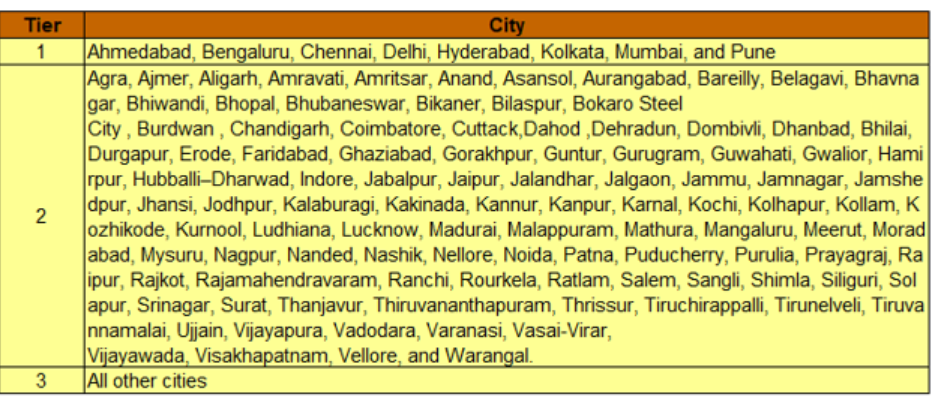

In [9]:
t1=['Ahmedabad', 'Bengaluru', 'Chennai', 'Delhi', 'Hyderabad', 'Kolkata', 'Mumbai', 'Pune']
t2=['Ajmer','Aligarh','Amravati','Amritsar','Anand','Asansol','Aurangabad','Bareilly','Belagavi','Bhavnagar','Bhiwandi','Bhopal','Bhubaneswar','Bikaner','Bilaspur','Bokaro Steel City','Burdwan','Chandigarh','Coimbatore','Cuttack','Dahod','Dehradun','Dombivli','Dhanbad','Bhilai','Durgapur','Erode','Faridabad','Ghaziabad','Gorakhpur','Guntur','Gurugram','Guwahati','Gwalior','Hamirpur','Hubli-Dharwad','Indore','Jabalpur','Jaipur','Jalandhar','Jalgaon','Jammu','Jamnagar','Jamshedpur','Jhansi','Jodhpur','Kalaburagi','Kakinada','Kannur','Kanpur','Karnal','Kochi','Kolhapur','Kollam','Kozhikode','Kurnool','Ludhiana','Lucknow','Madurai','Malappuram','Mathura','Mangaluru','Meerut','Moradabad','Mysore','Nagpur','Nanded-Waghala','Nashik','Nellore','Noida','Patna','Puducherry','Purulia','Prayagraj','Raipur','Rajkot','Rajahmundry','Ranchi','Rourkela','Ratlam','Salem','Sangli','Shimla','Siliguri','Solapur','Srinagar','Surat','Thanjavur','Thiruvananthapuram','Thrissur','Tiruchirappalli','Tirunelveli','Tiruvannamalai','Ujjain','Vijayapura','Vadodara','Varanasi','Vasai-Virar','Vijayawada','Visakhapatnam','Vellore','Warangal']

def city_tier(city):
  if city in t1:
    return 'Tier-1'
  elif city in t2:
    return 'Tier-2'
  else :
    return 'Tier-3'

cd_df['City'] = cd_df['City'].apply(lambda x: x.split(',')[0])
cd_df['City Tier'] = cd_df['City'].apply(lambda x: city_tier(x))
cd_df.head().style.set_properties(**{'background-color': '#4abdb8' ,'color':'black','border-color': '#000000'})


,index,City,Date,Card Type,Exp Type,Gender,Amount,Year-Month,City Tier
0,0,Delhi,2014-10-29 00:00:00,Gold,Bills,F,82475,2014-10-01 00:00:00,Tier-1
1,1,Greater Mumbai,2014-08-22 00:00:00,Platinum,Bills,F,32555,2014-08-01 00:00:00,Tier-3
2,2,Bengaluru,2014-08-27 00:00:00,Silver,Bills,F,101738,2014-08-01 00:00:00,Tier-1
3,3,Greater Mumbai,2014-04-12 00:00:00,Signature,Bills,F,123424,2014-04-01 00:00:00,Tier-3
4,4,Bengaluru,2015-05-05 00:00:00,Gold,Bills,F,171574,2015-05-01 00:00:00,Tier-1


### <div style="text-align: left; background-color: #4a89bd;  color: black; padding: 14px; line-height: 0.5;"> City Tier wise Analysis on Spent Amount</div>

In [10]:
tier_df2=cd_df[['City Tier', 'Amount']].groupby('City Tier').agg(Total_Amount=('Amount', 'sum')).reset_index()

fig = px.bar(tier_df2,
             x='City Tier', y='Total_Amount', color='City Tier', color_discrete_sequence=colors, text_auto='True' )

fig.update_layout(height=400,width=1000, title_text="<b>City Tier wise Amount Spent</b>",
                  title_font_family="Times New Roman",title_font_color="#2e837b",
                  title_xanchor="center",
                  title_x=0.5,
                  title_font_size=20,
                  xaxis_title="<b>City Tier</b>",
                  yaxis_title="<b>Amount Spent</b>",
                  legend_title='<b>City Tier</b>',
                  legend_title_font_color="#83502e",
                  showlegend=True,
                  plot_bgcolor ='#fdf1cb')
fig.show()

### <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> Analysis of Credit Card Type wise Transaction Count across City Tiers</div>

In [11]:
tier_cd_df = cd_df[['City Tier','Card Type']].groupby(['City Tier','Card Type']).size().reset_index()

tier_cd_df.columns = ['City Tier',	'Card Type','Count']

tier_cd_df = cd_df[['City Tier','Card Type']].groupby(['City Tier','Card Type']).size().reset_index()

tier_cd_df.columns = ['City Tier',	'Card Type','Count']

fig1=px.bar(data_frame=tier_cd_df, x='City Tier', y='Count', color='Card Type', barmode='group', color_discrete_sequence=colors, text_auto='True')

fig1.update_layout(
    title='<b>Transaction count across Cities Tiers</b>',
    font_family="Times New Roman",
    title_font_family="Times New Roman",
    title_font_color="#83502e",
    title_font_size=20,
    xaxis_title="<b>City Tier</b>",
    yaxis_title="<b>Count</b>",
    legend_title='<b>Card Type</b>',
    legend_title_font_color="#83502e",
    plot_bgcolor ='#fdf1cb'
)


fig1.show()

In [12]:
city_cnt_df = cd_df[['City Tier']].groupby(['City Tier']).size().reset_index()
city_cnt_df.columns = ['City Tier','Count']

fig = px.pie(city_cnt_df,
            names = 'City Tier' , values = 'Count' , color = 'City Tier' , hole = 0.25 , 
            template = 'ggplot2' , title = '<b> City Tier wise Credit Card Transaction Count </b>',
            labels={"Tier-1":"<b>Tier-1</b>"}, color_discrete_sequence=colors)

fig.update_traces(textinfo='percent+ value + label')

fig.update_layout(legend=dict(
     orientation="h",
    yanchor="bottom",
    y=-0.1,
    xanchor="center",
    x=0.5
    ))


fig.update_layout(
    title_font_family="Times New Roman",
    title_font_color="#83502e",
    title_font_size=20,
    title_xanchor="center",
    title_x=0.5
)

fig.update_traces(textposition='inside', textinfo='percent+label',
                         pull=[0, 0.2, 0], rotation=0)



fig.show()

### <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> Analysis of Male and Female Spend Patterns</div>

In [13]:
colors2 = ['red', 'blue', 'green', 'orange', 'yellow', 'purple']

In [14]:
def exp_plot(gender):
  exp_df = cd_df[cd_df['Gender']==gender][['City Tier', 'Exp Type', 'Amount']]
  exp_df = exp_df.sort_values(['City Tier'])
  if gender=='M': 
    gender_name='Male' 
  else:
    gender_name='Female' 

  fig=px.violin(data_frame=exp_df, 
                x=['City Tier','Exp Type'],y='Amount',template='simple_white',
                color = 'Exp Type',box=True,
                category_orders={"Exp Type"  : ['Bills', 'Food', 'Entertainment', 
                                                'Grocery', 'Fuel', 'Travel'],
                                 "City Tier" : ['Tier-1', 'Tier-2', 'Tier-3']},
                color_discrete_sequence=colors2)
  fig.update_yaxes(showgrid=True)

  fig.update_layout(
      title='<b>%s - Spend Pattern</b>' %gender_name,
      font_family="Courier New",
      title_font_family="Courier New",
      title_font_color="red",
      title_font_size=20,
      xaxis_title="<b>Year Month</b>",
      yaxis_title="<b>Mean Expenditure</b>",
      legend_title='<b>Exp Type</b>',
      legend_title_font_color="red",
      plot_bgcolor = '#FFFFFF'
  )

  fig.show()

In [15]:
exp_plot('F')

In [16]:
exp_plot('M')

# <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> ML Model</div>

### <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> Feature Engineering and Model Building</div>

In [17]:
ml_cd_df = cd_df.copy()

print(Back.YELLOW+ Style.BRIGHT+'Data for Model Building:'+ Style.RESET_ALL)
ml_cd_df.head().style.set_properties(**{'background-color': '#2e837b' ,'color':'black','border-color': '#000000'})

Data for Model Building:


,index,City,Date,Card Type,Exp Type,Gender,Amount,Year-Month,City Tier
0,0,Delhi,2014-10-29 00:00:00,Gold,Bills,F,82475,2014-10-01 00:00:00,Tier-1
1,1,Greater Mumbai,2014-08-22 00:00:00,Platinum,Bills,F,32555,2014-08-01 00:00:00,Tier-3
2,2,Bengaluru,2014-08-27 00:00:00,Silver,Bills,F,101738,2014-08-01 00:00:00,Tier-1
3,3,Greater Mumbai,2014-04-12 00:00:00,Signature,Bills,F,123424,2014-04-01 00:00:00,Tier-3
4,4,Bengaluru,2015-05-05 00:00:00,Gold,Bills,F,171574,2015-05-01 00:00:00,Tier-1


### <div style="text-align: left; background-color: #2e6183;  color: black; padding: 14px; line-height: 0.5;"> Data Transformation</div>

<div style="text-align: left; background-color: #2e6183;  color: black; padding: 14px; line-height: 1.25;"> <b>Transformation: </b>To convert the <b>Gender</b> categorical feature to numeric feature we shall map values <b>F</b> to <b>0</b> and <b>M</b> to <b>1</b>.  
    
To convert the <b>City Tier</b> categorical feature to numeric feature we shall map values <b>Tier-1</b> to <b>1</b>, <b>Tier-2</b> to <b>2</b>, <b>Tier-3</b> to <b>3</b>  
    
To convert the categorical features <b>Exp Type</b> and <b>Card Type</b> to numeric features we shall use <b>LabelEncoder()</b>

In [18]:
ml_cd_df['Gender'] = ml_cd_df['Gender'].map({'F':0, 'M':1})

ml_cd_df['City Tier'] = ml_cd_df['City Tier'].map({'Tier-1':1, 'Tier-2':2, 'Tier-3':3})

from sklearn import preprocessing
 

label_encoder = preprocessing.LabelEncoder()
 
# Encode labels
ml_cd_df['Exp Type']= label_encoder.fit_transform(ml_cd_df['Exp Type'])
ml_cd_df['Card Type']= label_encoder.fit_transform(ml_cd_df['Card Type'])

ml_cd_df.drop(['index', 'City', 'Date', 'Year-Month'], axis=1, inplace=True)

print(Back.YELLOW+ Style.BRIGHT+'Data for Model Building:'+ Style.RESET_ALL)
ml_cd_df.head().style.set_properties(**{'background-color': '#f1c27d' ,'color':'black','border-color': '#000000'})

Data for Model Building:


,Card Type,Exp Type,Gender,Amount,City Tier
0,0,0,0,82475,1
1,1,0,0,32555,3
2,3,0,0,101738,1
3,2,0,0,123424,3
4,0,0,0,171574,1


<Axes: >

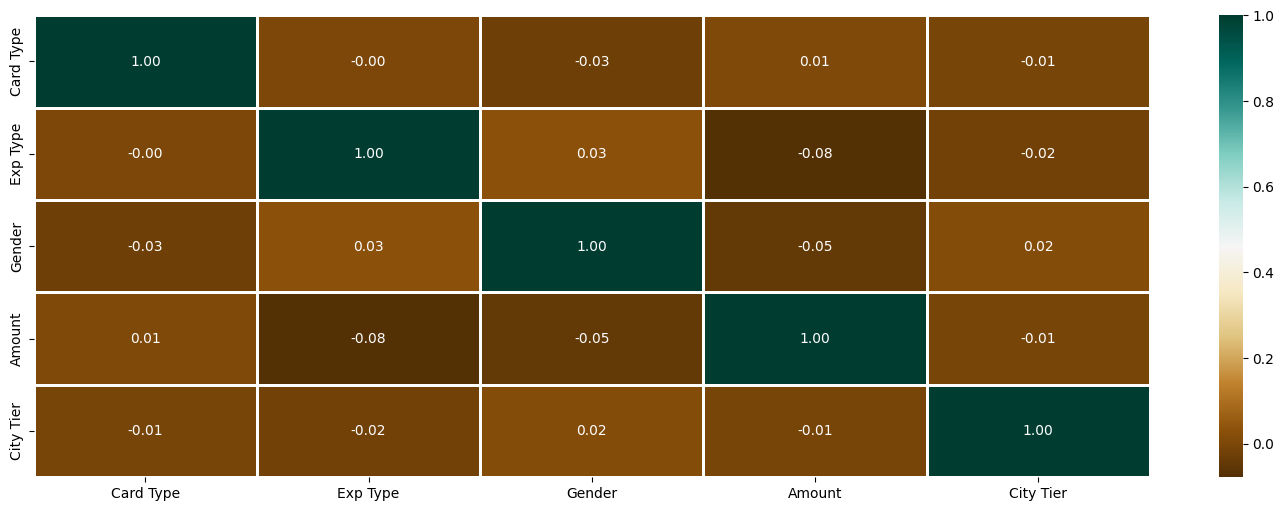

In [19]:
plt.figure(figsize=(18, 6))
sns.heatmap(ml_cd_df.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> Splitting Data into Train and Test</div>

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Split: </b>To split the data we shall use <b>sklearn.model_selection.train_test_split</b>.  
    
<b>Standardize: </b>To Standardize, we shall use <b>StandardScaler</b>

In [20]:
X= ml_cd_df[[ 'Card Type', 'Exp Type', 'Gender', 'City Tier']]
y= ml_cd_df[['Amount']]


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=25)

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> Linear Regression Model</div>

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [22]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
r2_scoree = r2_score(y_test, y_pred)
print(Back.BLUE+ Style.BRIGHT+'R Squared Score for Linear Regression Model is:'+ str(r2_scoree) + Style.RESET_ALL)

R Squared Score for Linear Regression Model is:0.004282175865952698


In [23]:
X= ml_cd_df[[ 'Card Type', 'Exp Type', 'Gender', 'City Tier']]
y= ml_cd_df[['Amount']]


In [24]:
import statsmodels.api as sm

In [25]:
X=sm.add_constant(X)

model_fit=sm.OLS(y,X).fit()

print(model_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                 Amount   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     56.05
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           3.73e-47
Time:                        01:04:23   Log-Likelihood:            -3.3757e+05
No. Observations:               26052   AIC:                         6.752e+05
Df Residuals:                   26047   BIC:                         6.752e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.743e+05   1996.398     87.300      0.0

### <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> Random Forest Model</div>

In [26]:
from sklearn.ensemble import RandomForestRegressor

In [27]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_scoree = r2_score(y_test, y_pred)
print(Back.BLUE+ Style.BRIGHT+'R Squared Score for Random Forest Regression Model is:'+ str(r2_scoree) + Style.RESET_ALL)

R Squared Score for Random Forest Regression Model is:0.013762677233078446


<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Observation: </b>The Random Forest Model appears to be better than Linear Regression Model, but these models need further tuning.

<div style="text-align: left; background-color: #fdf1cb;  color: black; padding: 14px; line-height: 1.25;"> <b>Further Observations on Dataset : </b> There is no specific trend observed in monthly transaction count. The sum of transaction amounts is nearly same in all of the cards types with little upper side on one of the card types.
        
Female spends are more than Male and has high values transactions (amount greater than 300K) under Expenses Type Bills. In general the Bills paid on credit cards cannot be as high as 900K.
    
In view of these observations, we can say that the data provided in the dataset is a summarised data and not of individual transactions.
    
The Data provided in the dataset helps in identifying venues for Credit Card business expansion.


### <div style="text-align: left; background-color: #2e837b;  color: black; padding: 14px; line-height: 0.5;"> Feature Analysis</div>

In [28]:
def correlation_ratio(categories, values):
    categories = np.array(categories)
    values = np.array(values)
    
    ssw = 0
    ssb = 0
    for category in set(categories):
        subgroup = values[np.where(categories == category)[0]]
        ssw += sum((subgroup-np.mean(subgroup))**2)
        ssb += len(subgroup)*(np.mean(subgroup)-np.mean(values))**2
        
    Eta = (ssb / (ssb + ssw))**.5

    return Eta

In [29]:
City_coef = correlation_ratio(cd_df['City'], cd_df['Amount'])
Card_coef = correlation_ratio(cd_df['Card Type'], cd_df['Amount'])
Exp_coef = correlation_ratio(cd_df['Exp Type'], cd_df['Amount'])
Gender_coef = correlation_ratio(cd_df['Gender'], cd_df['Amount'])


features_corr = {'City':City_coef
                ,'Card Type':Card_coef
                ,'Exp Type':Exp_coef
                ,'Gender':Gender_coef}

In [30]:
features_corr = sorted(features_corr.items(), key=lambda x: x[1], reverse=True)

In [31]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

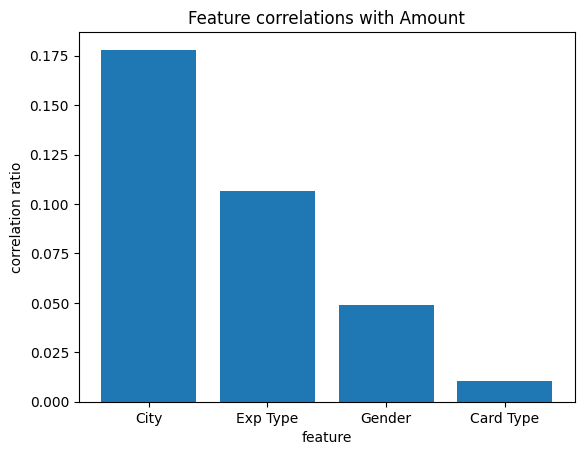

In [32]:
names = list(zip(*features_corr))[0]
values = list(zip(*features_corr))[1]

plt.bar(range(len(features_corr)), values, tick_label=names)
plt.title('Feature correlations with Amount')
plt.xlabel('feature')
plt.ylabel('correlation ratio')
plt.show()